# Assignment 2
# Shubhankar Sharma 

In [1]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/features_raw.csv')

features = df.drop(df.columns[-1],axis=1)
# Normalize features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

KMeans Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

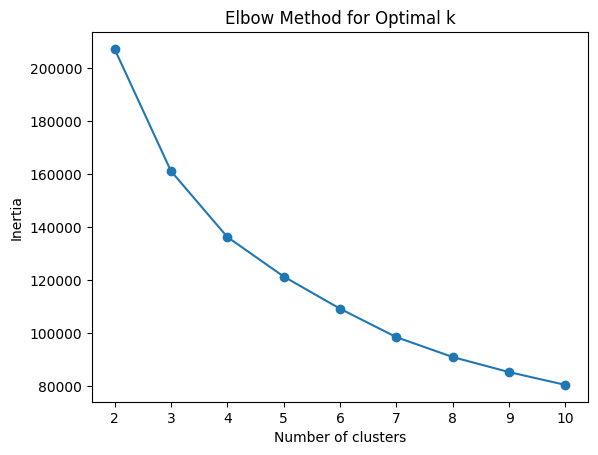

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

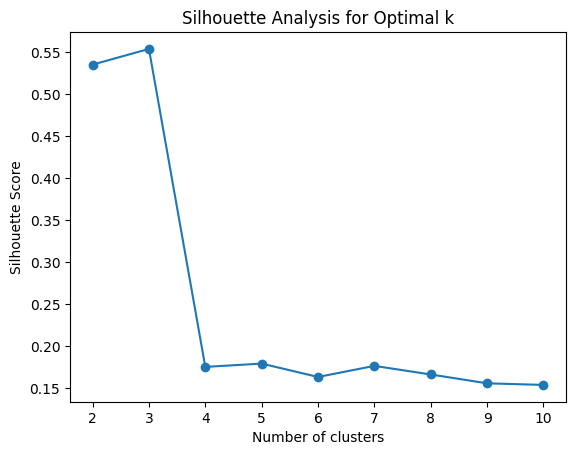

In [4]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(features_normalized)
    silhouette_avg = silhouette_score(features_normalized, clusters)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

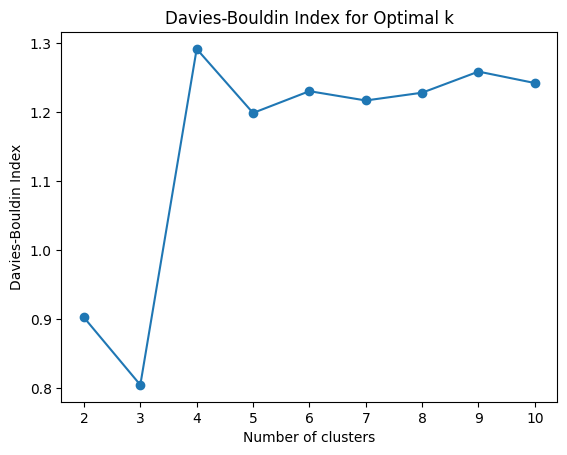

In [5]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(features_normalized)
    db_score = davies_bouldin_score(features_normalized, clusters)
    db_scores.append(db_score)

plt.plot(k_range, db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal k')
plt.show()


As per KMeans model and the above metrics, the optimal number of clusters is 3

The KMeans model provides better results than the KMedoids model as observed as the Silhouette score that it reports is better than that of KMedoids and the DB Score is also better

KMedoids Method

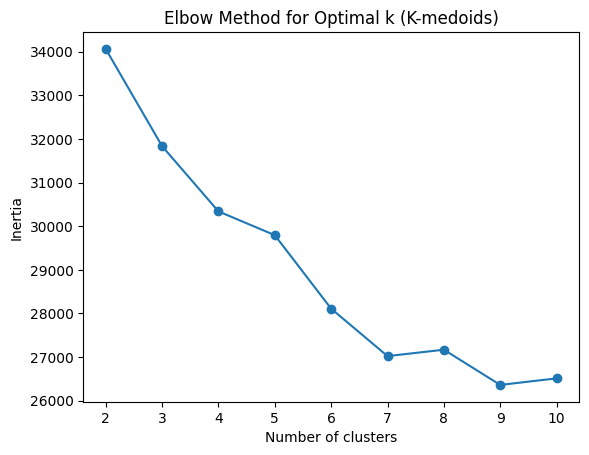

In [6]:
from sklearn_extra.cluster import KMedoids

inertia_kmedoids = []
k_range = range(2, 11)

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    clusters = kmedoids.fit_predict(features_normalized)
    inertia_kmedoids.append(kmedoids.inertia_)

plt.plot(k_range, inertia_kmedoids, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (K-medoids)')
plt.show()


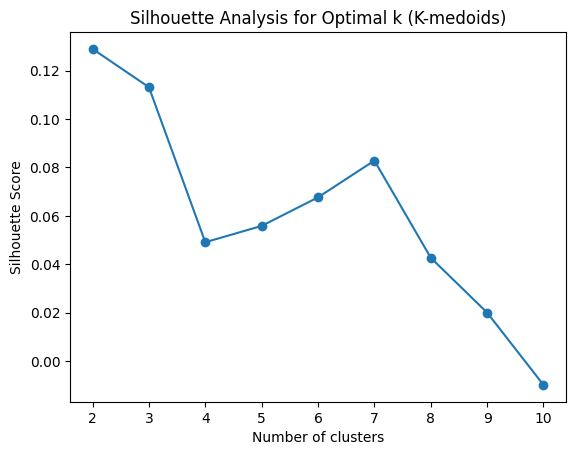

In [7]:
silhouette_scores_kmedoids = []

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    clusters = kmedoids.fit_predict(features_normalized)
    silhouette_avg = silhouette_score(features_normalized, clusters)
    silhouette_scores_kmedoids.append(silhouette_avg)

plt.plot(k_range, silhouette_scores_kmedoids, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k (K-medoids)')
plt.show()


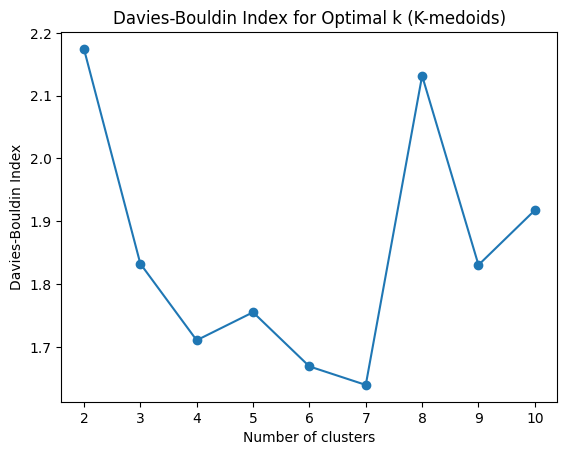

In [8]:
db_scores_kmedoids = []

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    clusters = kmedoids.fit_predict(features_normalized)
    db_score = davies_bouldin_score(features_normalized, clusters)
    db_scores_kmedoids.append(db_score)

plt.plot(k_range, db_scores_kmedoids, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal k (K-medoids)')
plt.show()


As per KMedoids model and the above metrics, the optimal number of clusters is 7

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

eps_range = [0.001,0.01,0.1, 10, 100]
min_samples_range = [5, 10, 15, 20]

silhouette_scores_dbscan = {}
db_scores_dbscan = {}

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(features_normalized)

        if len(set(clusters_dbscan)) > 1:
            silhouette_avg_dbscan = silhouette_score(features_normalized, clusters_dbscan)
            db_score_dbscan = davies_bouldin_score(features_normalized, clusters_dbscan)
        else:
            silhouette_avg_dbscan = -1
            db_score_dbscan = -1

        silhouette_scores_dbscan[(eps, min_samples)] = silhouette_avg_dbscan
        db_scores_dbscan[(eps, min_samples)] = db_score_dbscan

print("Silhouette Scores for DBSCAN:")
for params, score in silhouette_scores_dbscan.items():
    print(f"eps={params[0]}, min_samples={params[1]}: {score}")

print("\nDavies-Bouldin Scores for DBSCAN:")
for params, score in db_scores_dbscan.items():
    print(f"eps={params[0]}, min_samples={params[1]}: {score}")


Silhouette Scores for DBSCAN:
eps=0.001, min_samples=5: -1
eps=0.001, min_samples=10: -1
eps=0.001, min_samples=15: -1
eps=0.001, min_samples=20: -1
eps=0.01, min_samples=5: -1
eps=0.01, min_samples=10: -1
eps=0.01, min_samples=15: -1
eps=0.01, min_samples=20: -1
eps=0.1, min_samples=5: -1
eps=0.1, min_samples=10: -1
eps=0.1, min_samples=15: -1
eps=0.1, min_samples=20: -1
eps=10, min_samples=5: -1
eps=10, min_samples=10: -1
eps=10, min_samples=15: -1
eps=10, min_samples=20: -1
eps=100, min_samples=5: -1
eps=100, min_samples=10: -1
eps=100, min_samples=15: -1
eps=100, min_samples=20: -1

Davies-Bouldin Scores for DBSCAN:
eps=0.001, min_samples=5: -1
eps=0.001, min_samples=10: -1
eps=0.001, min_samples=15: -1
eps=0.001, min_samples=20: -1
eps=0.01, min_samples=5: -1
eps=0.01, min_samples=10: -1
eps=0.01, min_samples=15: -1
eps=0.01, min_samples=20: -1
eps=0.1, min_samples=5: -1
eps=0.1, min_samples=10: -1
eps=0.1, min_samples=15: -1
eps=0.1, min_samples=20: -1
eps=10, min_samples=5: -1
e

DBSCAN Model does not return appropriate results as it is more suitable for applications where there is noise whereas the data we have is well processed and has no noise as  such

To conclude, KMeans gives better results than KMedoids, followed by DBSCAN trailing these models.

The comparative scores are attached along with this code.